In [1]:
import statistics
import math

In [2]:
from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import os
includeWorkers = True
if includeWorkers:
    path = r'C:\Users\huda\Downloads\benchmarks_with_workers\benchmarks_with_workers'
    path = r'/home/dhu/Downloads/benchmarks_with_workers'
    parser = WorkerBenchmarkParser()
else:
    path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
    parser = BenchmarkParser()

In [3]:
def calculate_flexibility(machines_for_all_operations, n_machines): 
    counts = []

    for m in machines_for_all_operations:
        counts.append(len(m))
    
    return statistics.mean(counts) / n_machines

def calculate_duration_variety(durations):
    counts = 0
    values = []
    for duration in durations:
        for d in duration:
            for c in d:
                if c > 0:
                    counts += 1
                    if c not in values:
                        values.append(c)
    return len(values) / counts

def calculate_average_operations(job_sequence):
    n_jobs = 1
    counts = [1]
    for i in range(1, len(job_sequence)):
        if job_sequence[i] != job_sequence[i-1]:
            n_jobs+=1
            counts.append(0)
        counts[-1] += 1
    return (sum(counts))/n_jobs

def calculate_duration_features_workers(durations):
    all_durations = []
    for duration in durations:
        for d in duration:
            all_durations.extend(d)
    all_durations = [float(d) for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    stdev = statistics.stdev(all_durations)
    return min_duration, max_duration, statistics.mean(all_durations), span, stdev

def calculate_duration_features(durations):
    all_durations = []
    for duration in durations:
        all_durations.extend(duration)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    #stdev = statistics.stdev(all_durations)
    mean = sum(all_durations)/len(all_durations)
    var = sum(pow(x-mean, 2) for x in all_durations) / len(all_durations)
    stdev = math.sqrt(var)
    return min_duration, max_duration, statistics.mean(all_durations), span, stdev

def remap(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[0].startswith('Behnke'):
        return 'Behnke'+values[1]
    if values[0].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[1]
    if values[0].startswith('Chambers'):
        return 'ChambersBarnes'+values[1]
    if values[0].startswith('HurinkS'):
        return 'HurinkSdata'+values[1]
    if values[0].startswith('HurinkE'):
        return 'HurinkEdata'+values[1]
    if values[0].startswith('HurinkR'):
        return 'HurinkRdata'+values[1]
    if values[0].startswith('HurinkV'):
        return 'HurinkVdata'+values[1]
    if values[0].startswith('DP'):
        return 'DPpaulli'+values[1]
    if values[0].startswith('Kacem'):
        return 'Kacem'+values[1]
    if values[0].startswith('Fattahi'):
        return 'Fattahi'+values[1]
    return name

In [4]:
instances = os.listdir(path)
instance_data = []
consider_duration_features = True
for instance in instances:
    encoding = parser.parse_benchmark(path + "/" + instance)
    min_d, max_d, d_mean, d_span, d_stdev = calculate_duration_features(encoding.durations()) if not includeWorkers else calculate_duration_features_workers(encoding.durations())
    #TODO: worker data, or just do it with base FJSSP since all benchmarks are transformed in the same way
    extracted_data = {
        "name": remap(instance[2:-12]),
        "n_jobs": encoding.n_jobs(), 
        "n_machines": encoding.n_machines(),
        "n_operations": encoding.n_operations(),
        "durations": encoding.durations(),
        "job_sequence": encoding.job_sequence(),
        "machines_for_all_operations": encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(),
        "flexibility": calculate_flexibility(encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(), encoding.n_machines()),
        "duration_variety": calculate_duration_variety(encoding.durations()),
        "average_operations": calculate_average_operations(encoding.job_sequence()),
        "min_duration": min_d,
        "max_duration": max_d,
        "duration_span": d_span,
        "duration_std": d_stdev,
        "duration_mean": d_mean
    }
    instance_data.append(extracted_data)

In [5]:
#optimal_benchmarks = ['BrandimarteMk1', 'HurinkSdata10', 'HurinkSdata11', 'HurinkSdata12', 'HurinkSdata13', 'HurinkSdata14', 'HurinkSdata15', 'HurinkSdata16', 'HurinkSdata17', 'HurinkSdata18', 'HurinkSdata1', 'HurinkSdata34', 'HurinkSdata49', 'HurinkSdata4', 'HurinkSdata52', 'HurinkSdata8', 'HurinkSdata9', 'HurinkEdata1', 'HurinkEdata52', 'HurinkEdata53', 'HurinkEdata5', 'HurinkEdata7', 'HurinkEdata8', 'HurinkRdata19', 'HurinkRdata1', 'HurinkRdata45', 'HurinkRdata55', 'HurinkVdata19', 'HurinkVdata1', 'HurinkVdata20', 'HurinkVdata21', 'HurinkVdata22', 'HurinkVdata23', 'HurinkVdata2', 'HurinkVdata39', 'HurinkVdata40', 'HurinkVdata41', 'HurinkVdata42', 'HurinkVdata43', 'HurinkVdata45', 'HurinkVdata54', 'HurinkVdata55', 'HurinkVdata57', 'HurinkVdata59', 'HurinkVdata60', 'HurinkVdata61', 'HurinkVdata62', 'HurinkVdata64', 'HurinkVdata65', 'HurinkVdata66', 'Kacem1', 'Kacem2', 'Kacem3', 'Fattahi10', 'Fattahi11', 'Fattahi12', 'Fattahi13', 'Fattahi14', 'Fattahi15', 'Fattahi16', 'Fattahi1', 'Fattahi2', 'Fattahi3', 'Fattahi4', 'Fattahi5', 'Fattahi6', 'Fattahi7', 'Fattahi8', 'Fattahi9']
optimal_benchmarks = ['BrandimarteMk1', 'Hurink_sdata_1', 'Hurink_sdata_4', 'Hurink_sdata_8', 'Hurink_edata_1', 'Hurink_edata_53', 'Hurink_edata_5', 'Hurink_edata_7', 'Hurink_edata_8', 'Hurink_rdata_19', 'Hurink_rdata_1', 'Hurink_rdata_45', 'Hurink_rdata_55', 'Hurink_vdata_19', 'Hurink_vdata_1', 'Hurink_vdata_20', 'Hurink_vdata_21', 'Hurink_vdata_22', 'Hurink_vdata_23', 'Hurink_vdata_2', 'Hurink_vdata_39', 'Hurink_vdata_40', 'Hurink_vdata_41', 'Hurink_vdata_42', 'Hurink_vdata_43', 'Hurink_vdata_45', 'Hurink_vdata_54', 'Hurink_vdata_55', 'Hurink_vdata_57', 'Hurink_vdata_59', 'Hurink_vdata_60', 'Hurink_vdata_61', 'Hurink_vdata_62', 'Hurink_vdata_64', 'Hurink_vdata_65', 'Hurink_vdata_66', 'Kacem1', 'Kacem2', 'Kacem3', 'Fattahi10', 'Fattahi11', 'Fattahi12', 'Fattahi13', 'Fattahi14', 'Fattahi15', 'Fattahi16', 'Fattahi1', 'Fattahi2', 'Fattahi3', 'Fattahi4', 'Fattahi5', 'Fattahi6', 'Fattahi7', 'Fattahi8', 'Fattahi9', 'Hurink_sdata_10', 'Hurink_sdata_11', 'Hurink_sdata_12', 'Hurink_sdata_13', 'Hurink_sdata_14', 'Hurink_sdata_15', 'Hurink_sdata_16', 'Hurink_sdata_17', 'Hurink_sdata_18', 'Hurink_sdata_34', 'Hurink_sdata_9', 'Hurink_sdata_49', 'Hurink_sdata_52', 'Hurink_edata_52']

In [6]:
count = 0
for instance in instance_data:
    if instance['name'] in optimal_benchmarks:
        count += 1
print(count)

69


In [7]:
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
    if instance['name'] in optimal_benchmarks:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])

In [8]:
print(max(optimal_data['duration_span']))
for metric in optimal_data:
    print(f'{metric}: Average: {statistics.mean(optimal_data[metric])} | Stdv: {statistics.stdev(optimal_data[metric])}')

1080.0
flexibility: Average: 0.41450975405951745 | Stdv: 0.22514257970378057
duration_variety: Average: 0.30587383780306715 | Stdv: 0.30321836095921606
operations: Average: 73.98550724637681 | Stdv: 62.05677968214536
machines: Average: 7.173913043478261 | Stdv: 3.3429316199792027
duration_mean: Average: 101.3104941020186 | Stdv: 131.60693333392516
duration_std: Average: 53.77159745152242 | Stdv: 81.16046972591236
duration_span: Average: 205.59420289855072 | Stdv: 293.34176608625864


In [9]:
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
    if instance['name'] in optimal_benchmarks and instance['duration_span'] > 100:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])

In [10]:
for metric in optimal_data:
    print(f'{metric}: Average: {statistics.mean(optimal_data[metric])} | Stdv: {statistics.stdev(optimal_data[metric])}')

flexibility: Average: 0.42596432463720074 | Stdv: 0.166823655165608
duration_variety: Average: 0.3206911033935656 | Stdv: 0.33447592637870144
operations: Average: 85.83720930232558 | Stdv: 72.1010964293352
machines: Average: 8.279069767441861 | Stdv: 3.4937057784600554
duration_mean: Average: 139.03484104810437 | Stdv: 154.60801877634643
duration_std: Average: 74.8517155477724 | Stdv: 96.92138346473797
duration_span: Average: 287.51162790697674 | Stdv: 346.8484211331009


In [11]:
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
    if instance['duration_span'] > 100:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])

In [12]:
for metric in optimal_data:
    print(f'{metric}: Average: {statistics.mean(optimal_data[metric])} | Stdv: {statistics.stdev(optimal_data[metric])}')

flexibility: Average: 0.2568950917117053 | Stdv: 0.17262359130141436
duration_variety: Average: 0.19418965122034487 | Stdv: 0.25968229539195037
operations: Average: 138.35087719298247 | Stdv: 83.10637336799945
machines: Average: 9.416666666666666 | Stdv: 3.217118766399817
duration_mean: Average: 116.94914768570358 | Stdv: 148.13891204933987
duration_std: Average: 64.27005326367903 | Stdv: 87.41264147216474
duration_span: Average: 251.46929824561403 | Stdv: 340.069990108202


In [13]:
optimal_benchmarks = ['BrandimarteMk1', 'HurinkSdata10', 'HurinkSdata11', 'HurinkSdata12', 'HurinkSdata13', 'HurinkSdata14', 'HurinkSdata15', 'HurinkSdata16', 'HurinkSdata17', 'HurinkSdata18', 'HurinkSdata1', 'HurinkSdata34', 'HurinkSdata49', 'HurinkSdata4', 'HurinkSdata52', 'HurinkSdata8', 'HurinkSdata9', 'HurinkEdata1', 'HurinkEdata52', 'HurinkEdata53', 'HurinkEdata5', 'HurinkEdata7', 'HurinkEdata8', 'HurinkRdata19', 'HurinkRdata1', 'HurinkRdata45', 'HurinkRdata55', 'HurinkVdata19', 'HurinkVdata1', 'HurinkVdata20', 'HurinkVdata21', 'HurinkVdata22', 'HurinkVdata23', 'HurinkVdata2', 'HurinkVdata39', 'HurinkVdata40', 'HurinkVdata41', 'HurinkVdata42', 'HurinkVdata43', 'HurinkVdata45', 'HurinkVdata54', 'HurinkVdata55', 'HurinkVdata57', 'HurinkVdata59', 'HurinkVdata60', 'HurinkVdata61', 'HurinkVdata62', 'HurinkVdata64', 'HurinkVdata65', 'HurinkVdata66', 'Kacem2', 'Fattahi16']

In [14]:
len(optimal_benchmarks)

52

In [15]:
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
    if instance['name'] in optimal_benchmarks:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])

In [16]:
for metric in optimal_data:
    print(f'{metric}: Average: {statistics.mean(optimal_data[metric])} | Stdv: {statistics.stdev(optimal_data[metric])}')

flexibility: Average: 0.5725108225108225 | Stdv: 0.3703592236411622
duration_variety: Average: 0.17066161357767984 | Stdv: 0.2605051530790126
operations: Average: 36 | Stdv: 16.64331697709324
machines: Average: 6.666666666666667 | Stdv: 0.5773502691896257
duration_mean: Average: 51.6812939094345 | Stdv: 80.17413455406873
duration_std: Average: 21.809086117962707 | Stdv: 28.811499773503204
duration_span: Average: 136.66666666666666 | Stdv: 148.39586696850196


In [17]:

i = 50
c = 0
d = []
labels = []
complete_data = []
while c < (10000/i):
    labels.append(f'{i*c} - {(c+1)*i}')
    optimal_data = {
        'flexibility': [],
        'duration_variety': [],
        'operations': [],
        'machines': [],
        'duration_mean': [],
        'duration_std': [],
        'duration_span': []
    }
    for instance in instance_data:
        if instance['duration_span'] >= (i*c) and instance['duration_span'] <= (c+1)*i:
            optimal_data['flexibility'].append(instance['flexibility'])
            optimal_data['duration_variety'].append(instance['duration_variety'])
            optimal_data['operations'].append(instance['n_operations'])
            optimal_data['machines'].append(instance['n_machines'])
            optimal_data['duration_mean'].append(instance['duration_mean'])
            optimal_data['duration_std'].append(instance['duration_std'])
            optimal_data['duration_span'].append(instance['duration_span'])
    c+=1
    complete_data.append(optimal_data)
    plot_data = {
        'flexibility': [[],[]],
        'duration_variety': [[],[]],
        'operations': [[],[]],
        'machines': [[],[]],
        'duration_mean': [[],[]],
        'duration_std': [[],[]],
        'duration_span': [[],[]],
        'count': len(optimal_data['flexibility'])
    }
    for metric in optimal_data:
        plot_data[metric][0] = statistics.mean(optimal_data[metric]) if len(optimal_data[metric]) > 0 else 0
        plot_data[metric][1] = statistics.stdev(optimal_data[metric]) if len(optimal_data[metric]) > 1 else 0
    d.append(plot_data)

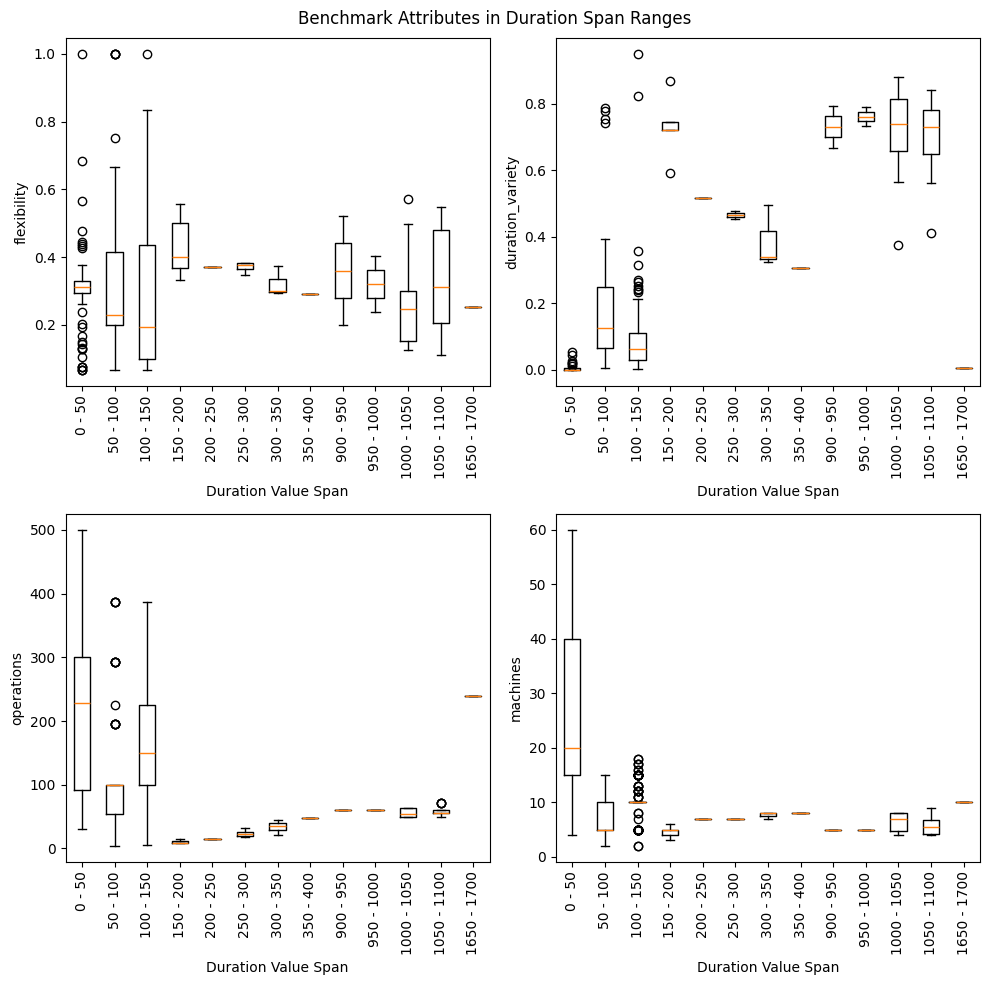

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(layout='tight', figsize=(10,10))
axs = fig.subplots(2, 2)
r = 0
c = 0
fig.suptitle('Benchmark Attributes in Duration Span Ranges')
for attribute in complete_data[0].keys():
    if attribute != 'duration_mean' and attribute != 'duration_std' and attribute != 'duration_span':
        x = [x[attribute] for x in complete_data]
        ulabels = labels.copy()
        indices = []
        for i in range(len(x)):
            if len(x[i]) == 0:
                indices.append(i)
        indices.sort(reverse=True)
        for index in indices:
            x.pop(index)
            ulabels.pop(index)
        axs[r][c].boxplot(x, tick_labels=ulabels)
        axs[r][c].tick_params(axis='x', labelrotation=90)
        #axs[r][c].set_title(attribute)
        axs[r][c].set_xlabel('Duration Value Span')
        axs[r][c].set_ylabel(attribute)
        #plt.boxplot(x, tick_labels=ulabels)
        #plt.xticks(rotation=90)
        #plt.title(attribute)
        c+=1
        if c > 1:
            r=1
            c=0
plt.show()
#for i in range(len(labels)):
    
    
    

In [19]:
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:

    optimal_data['flexibility'].append(instance['flexibility'])
    optimal_data['duration_variety'].append(instance['duration_variety'])
    optimal_data['operations'].append(instance['n_operations'])
    optimal_data['machines'].append(instance['n_machines'])
    optimal_data['duration_mean'].append(instance['duration_mean'])
    optimal_data['duration_std'].append(instance['duration_std'])
    optimal_data['duration_span'].append(instance['duration_span'])

print(max(optimal_data['duration_variety']))
print(min(optimal_data['duration_span']))
print(max(optimal_data['duration_span']))

0.95
5.0
1662.0


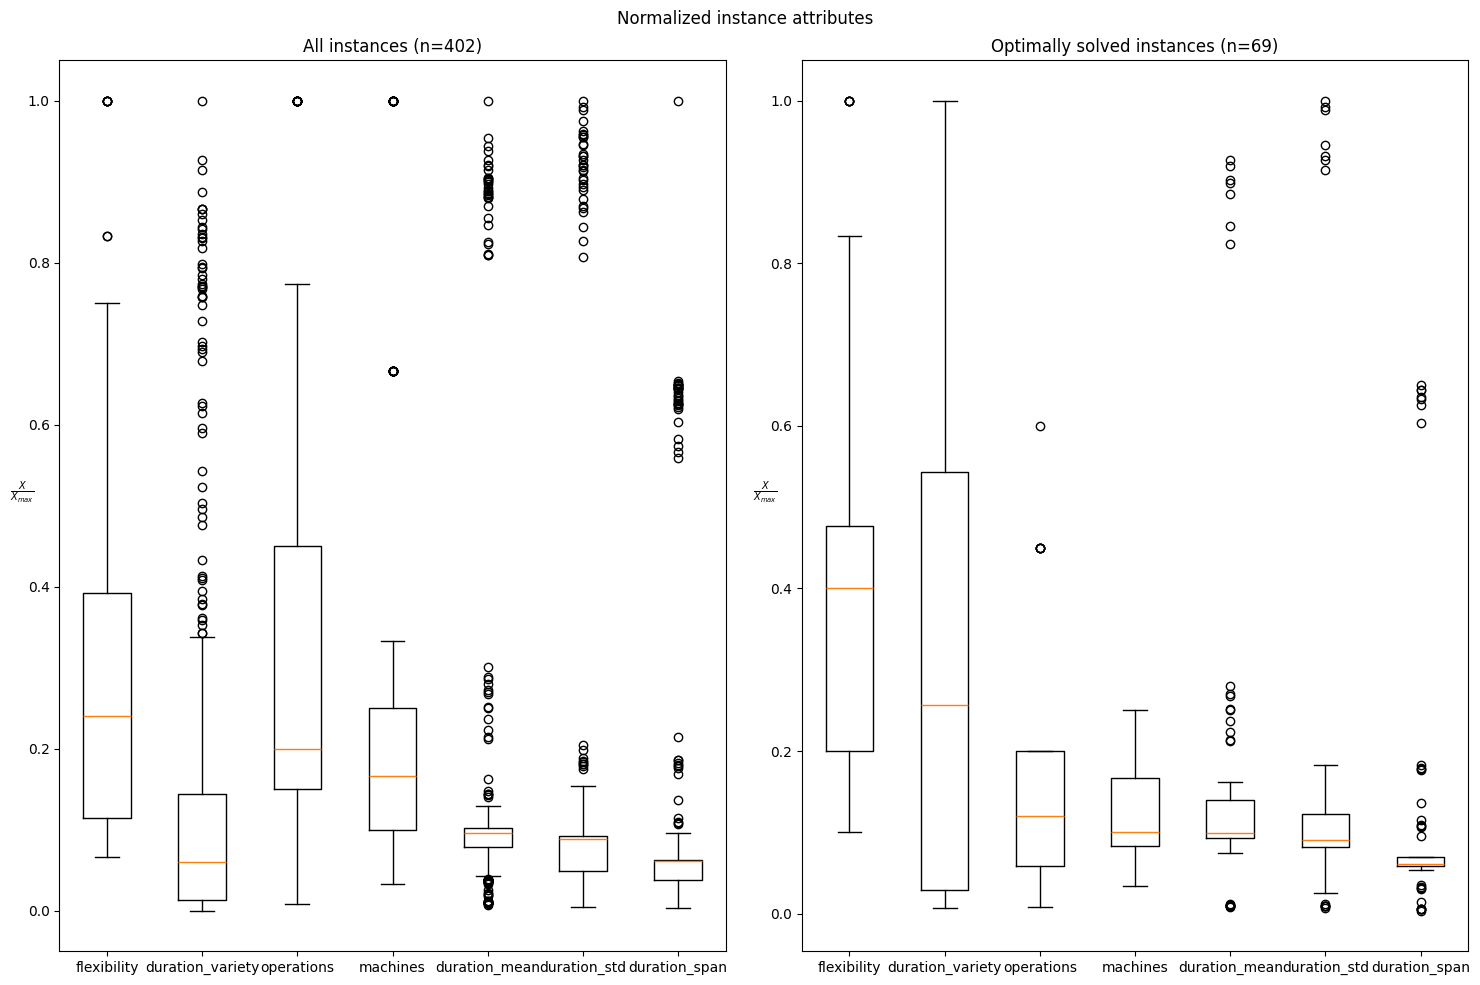

In [ ]:
plt.rcParams['text.usetex'] = False
fig = plt.figure(layout='tight', figsize=(15,10))
axs = fig.subplots(1, 2)
r = 0
c = 0

fig.suptitle('Normalized instance attributes')
maxs = dict()
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])
plot_data = []
labels=[]
for attribute in optimal_data:
    #if attribute != 'duration_mean' and attribute != 'duration_std' and attribute != 'duration_span':
    maxs[attribute] = max(optimal_data[attribute])
    x = [x/maxs[attribute] for x in optimal_data[attribute]]
    labels.append(attribute)
    plot_data.append(x)
axs[0].set_title(f'All instances (n={len(plot_data[0])})')
axs[0].boxplot(plot_data, tick_labels=labels)
axs[0].set_ylabel(r'$\frac{X}{X_{max}}$', rotation=0)

optimal_benchmarks = ['BrandimarteMk1', 'Hurink_sdata_1', 'Hurink_sdata_4', 'Hurink_sdata_8', 'Hurink_edata_1', 'Hurink_edata_53', 'Hurink_edata_5', 'Hurink_edata_7', 'Hurink_edata_8', 'Hurink_rdata_19', 'Hurink_rdata_1', 'Hurink_rdata_45', 'Hurink_rdata_55', 'Hurink_vdata_19', 'Hurink_vdata_1', 'Hurink_vdata_20', 'Hurink_vdata_21', 'Hurink_vdata_22', 'Hurink_vdata_23', 'Hurink_vdata_2', 'Hurink_vdata_39', 'Hurink_vdata_40', 'Hurink_vdata_41', 'Hurink_vdata_42', 'Hurink_vdata_43', 'Hurink_vdata_45', 'Hurink_vdata_54', 'Hurink_vdata_55', 'Hurink_vdata_57', 'Hurink_vdata_59', 'Hurink_vdata_60', 'Hurink_vdata_61', 'Hurink_vdata_62', 'Hurink_vdata_64', 'Hurink_vdata_65', 'Hurink_vdata_66', 'Kacem1', 'Kacem2', 'Kacem3', 'Fattahi10', 'Fattahi11', 'Fattahi12', 'Fattahi13', 'Fattahi14', 'Fattahi15', 'Fattahi16', 'Fattahi1', 'Fattahi2', 'Fattahi3', 'Fattahi4', 'Fattahi5', 'Fattahi6', 'Fattahi7', 'Fattahi8', 'Fattahi9', 'Hurink_sdata_10', 'Hurink_sdata_11', 'Hurink_sdata_12', 'Hurink_sdata_13', 'Hurink_sdata_14', 'Hurink_sdata_15', 'Hurink_sdata_16', 'Hurink_sdata_17', 'Hurink_sdata_18', 'Hurink_sdata_34', 'Hurink_sdata_9', 'Hurink_sdata_49', 'Hurink_sdata_52', 'Hurink_edata_52']
optimal_data = {
    'flexibility': [],
    'duration_variety': [],
    'operations': [],
    'machines': [],
    'duration_mean': [],
    'duration_std': [],
    'duration_span': []
}
for instance in instance_data:
    if instance['name'] in optimal_benchmarks:
        optimal_data['flexibility'].append(instance['flexibility'])
        optimal_data['duration_variety'].append(instance['duration_variety'])
        optimal_data['operations'].append(instance['n_operations'])
        optimal_data['machines'].append(instance['n_machines'])
        optimal_data['duration_mean'].append(instance['duration_mean'])
        optimal_data['duration_std'].append(instance['duration_std'])
        optimal_data['duration_span'].append(instance['duration_span'])

labels = []
plot_data = []
for attribute in optimal_data:
    #if attribute != 'duration_mean' and attribute != 'duration_std' and attribute != 'duration_span':
    n = max(optimal_data[attribute])
    x = [x/maxs[attribute] for x in optimal_data[attribute]]
    labels.append(attribute)
    plot_data.append(x)
axs[1].set_title(f'Optimally solved instances (n={len(plot_data[0])})')
axs[1].boxplot(plot_data, tick_labels=labels)
axs[1].set_ylabel(r'$\frac{X}{X_{max}}$', rotation=0)

plt.show()

